# Lecture 14
In this example, we will use **hierarchical clustering** to cluster iris flowers based on the length and width of the petals and sepals.

In [1]:
# Load libraries
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
from scipy.cluster.hierarchy import linkage, dendrogram, fcluster
from sklearn import metrics

In [2]:
# Load dataset
data = sns.load_dataset("iris")
data.head()

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa


In [3]:
# Explore dataset
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   sepal_length  150 non-null    float64
 1   sepal_width   150 non-null    float64
 2   petal_length  150 non-null    float64
 3   petal_width   150 non-null    float64
 4   species       150 non-null    object 
dtypes: float64(4), object(1)
memory usage: 6.0+ KB


In [4]:
# Explore categorical variables
print(data.species.unique())

['setosa' 'versicolor' 'virginica']


In [5]:
# Factorize class labels
factor = pd.factorize(data['species'])
print(factor[0])
data.species = factor[0]

[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 2 2 2 2 2 2 2 2 2 2 2
 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2
 2 2]


[Text(0.5, 1.0, 'iris data'),
 Text(0.5, 0, 'petal width'),
 Text(0, 0.5, 'petal length')]

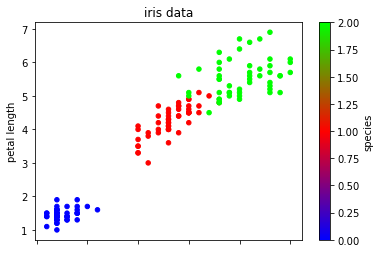

In [6]:
# Plot data
ax = data.plot(kind = 'scatter', x = 'petal_width', y = 'petal_length', c = 'species', colormap = plt.cm.brg)
ax.set(title = 'iris data', xlabel = 'petal width', ylabel = 'petal length')

In [7]:
# Partition dataset into attributes and class labels
X = data.drop('species', axis = 1)
Y = data['species']

In [8]:
# CLUSTERING: Agglomerative clustering with single (min) linkage
clustering = linkage(X, method = "single", metric = "euclidean")

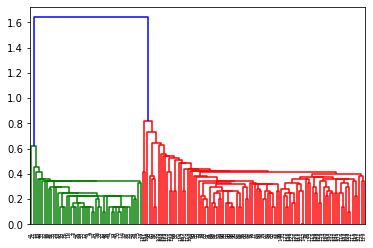

In [9]:
# Plot dendrogram
plt.figure()
dendrogram(clustering)
plt.show()

In [10]:
# Form clusters
clusters = fcluster(clustering, 3, criterion = 'maxclust')
print(clusters)

[1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3
 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3
 3 3 3 3 3 3 2 3 3 3 3 3 3 3 3 3 3 3 3 3 2 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3
 3 3]


[Text(0.5, 1.0, 'iris data'),
 Text(0.5, 0, 'petal width'),
 Text(0, 0.5, 'petal length')]

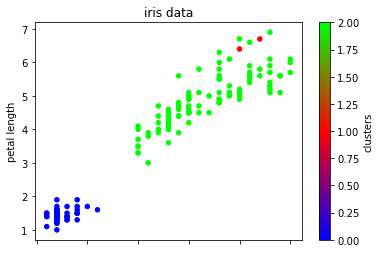

In [11]:
# Plot clusters
data['clusters'] = clusters - 1
ax = data.plot(kind = 'scatter', x = 'petal_width', y = 'petal_length', c = 'clusters', colormap = plt.cm.brg)
ax.set(title = 'iris data', xlabel = 'petal width', ylabel = 'petal length')

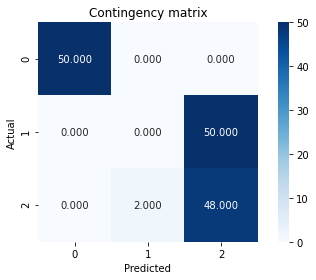

In [12]:
# Plot contingency matrix
cont_matrix = metrics.cluster.contingency_matrix(data['species'], data['clusters'])
sns.heatmap(cont_matrix, annot = True, fmt = ".3f", square = True, cmap = plt.cm.Blues)
plt.ylabel('Actual')
plt.xlabel('Predicted')
plt.title('Contingency matrix')
plt.tight_layout()

In [13]:
# Compute adjusted Rand index and silhouette coefficient
print(metrics.adjusted_rand_score(data['species'], data['clusters']))
print(metrics.silhouette_score(X, data['clusters'], metric = "euclidean"))

0.5637510205230709
0.5121107753649314


In [14]:
# CLUSTERING: Agglomerative clustering with complete (max) linkage
clustering = linkage(X, method = "complete", metric = "euclidean")

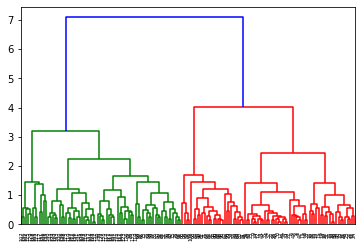

In [15]:
# Plot dendrogram
plt.figure()
dendrogram(clustering)
plt.show()

In [16]:
# Form clusters
clusters = fcluster(clustering, 3, criterion = 'maxclust')
print(clusters)

[3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3
 3 3 3 3 3 3 3 3 3 3 3 3 3 1 1 1 2 1 2 1 2 1 2 2 2 2 1 2 1 2 2 1 2 1 2 1 1
 1 1 1 1 1 2 2 2 2 1 2 1 1 1 2 2 2 1 2 2 2 2 2 1 2 2 1 1 1 1 1 1 2 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1]


[Text(0.5, 1.0, 'iris data'),
 Text(0.5, 0, 'petal width'),
 Text(0, 0.5, 'petal length')]

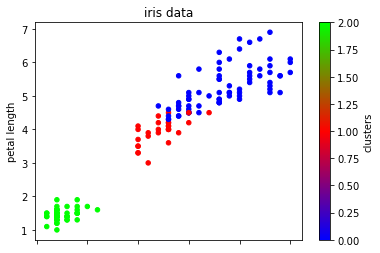

In [17]:
# Plot clusters
data['clusters'] = clusters - 1
ax = data.plot(kind = 'scatter', x = 'petal_width', y = 'petal_length', c = 'clusters', colormap = plt.cm.brg)
ax.set(title = 'iris data', xlabel = 'petal width', ylabel = 'petal length')

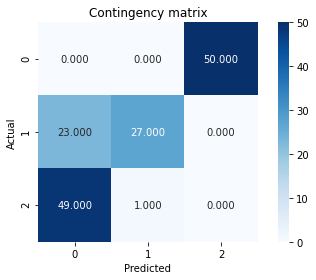

In [18]:
# Plot contingency matrix
cont_matrix = metrics.cluster.contingency_matrix(data['species'], data['clusters'])
sns.heatmap(cont_matrix, annot = True, fmt = ".3f", square = True, cmap = plt.cm.Blues)
plt.ylabel('Actual')
plt.xlabel('Predicted')
plt.title('Contingency matrix')
plt.tight_layout()

In [19]:
# Compute adjusted Rand index and silhouette coefficient
print(metrics.adjusted_rand_score(data['species'], data['clusters']))
print(metrics.silhouette_score(X, data['clusters'], metric = "euclidean"))

0.64225125183629
0.5135953221192219


In [20]:
# CLUSTERING: Agglomerative clustering with average linkage
clustering = linkage(X, method = "average", metric = "euclidean")

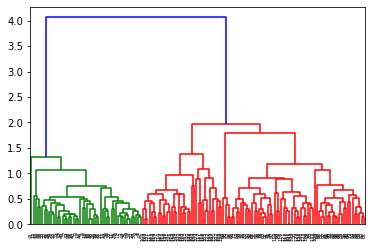

In [21]:
# Plot dendrogram
plt.figure()
dendrogram(clustering)
plt.show()

In [22]:
# Form clusters
clusters = fcluster(clustering, 3, criterion = 'maxclust')
print(clusters)

[1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3
 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 2 3 2 2 2 2 3 2 2 2 2
 2 2 3 3 2 2 2 2 3 2 3 2 3 2 2 3 3 2 2 2 2 2 3 2 2 2 2 3 2 2 2 3 2 2 2 3 2
 2 3]


[Text(0.5, 1.0, 'iris data'),
 Text(0.5, 0, 'petal width'),
 Text(0, 0.5, 'petal length')]

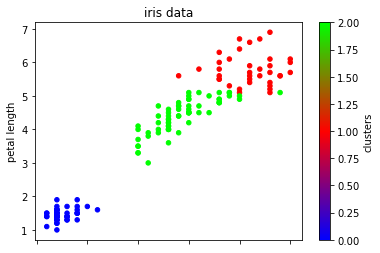

In [23]:
# Plot clusters
data['clusters'] = clusters - 1
ax = data.plot(kind = 'scatter', x = 'petal_width', y = 'petal_length', c = 'clusters', colormap = plt.cm.brg)
ax.set(title = 'iris data', xlabel = 'petal width', ylabel = 'petal length')

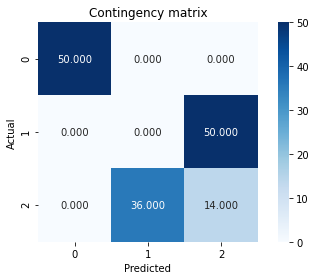

In [24]:
# Plot contingency matrix
cont_matrix = metrics.cluster.contingency_matrix(data['species'], data['clusters'])
sns.heatmap(cont_matrix, annot = True, fmt = ".3f", square = True, cmap = plt.cm.Blues)
plt.ylabel('Actual')
plt.xlabel('Predicted')
plt.title('Contingency matrix')
plt.tight_layout()

In [25]:
# Compute adjusted Rand index and silhouette coefficient
print(metrics.adjusted_rand_score(data['species'], data['clusters']))
print(metrics.silhouette_score(X, data['clusters'], metric = "euclidean"))

0.7591987071071522
0.5541608580282856


In [26]:
# CLUSTERING: Agglomerative clustering with Ward's method
clustering = linkage(X, method = "ward", metric = "euclidean")

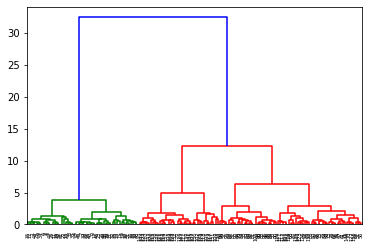

In [27]:
# Plot dendrogram
plt.figure()
dendrogram(clustering)
plt.show()

In [28]:
# Form clusters
clusters = fcluster(clustering, 3, criterion = 'maxclust')
print(clusters)

[1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3
 3 3 3 2 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 2 3 2 2 2 2 3 2 2 2 2
 2 2 3 3 2 2 2 2 3 2 3 2 3 2 2 3 3 2 2 2 2 2 3 3 2 2 2 3 2 2 2 3 2 2 2 3 2
 2 3]


[Text(0.5, 1.0, 'iris data'),
 Text(0.5, 0, 'petal width'),
 Text(0, 0.5, 'petal length')]

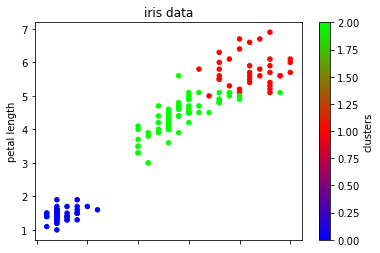

In [29]:
# Plot clusters
data['clusters'] = clusters - 1
ax = data.plot(kind = 'scatter', x = 'petal_width', y = 'petal_length', c = 'clusters', colormap = plt.cm.brg)
ax.set(title = 'iris data', xlabel = 'petal width', ylabel = 'petal length')

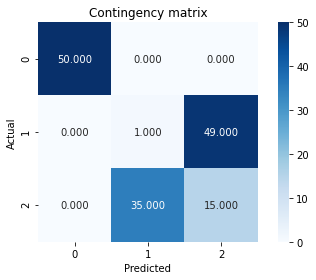

In [30]:
# Plot contingency matrix
cont_matrix = metrics.cluster.contingency_matrix(data['species'], data['clusters'])
sns.heatmap(cont_matrix, annot = True, fmt = ".3f", square = True, cmap = plt.cm.Blues)
plt.ylabel('Actual')
plt.xlabel('Predicted')
plt.title('Contingency matrix')
plt.tight_layout()

In [31]:
# Compute adjusted Rand index and silhouette coefficient
print(metrics.adjusted_rand_score(data['species'], data['clusters']))
print(metrics.silhouette_score(X, data['clusters'], metric = "euclidean"))

0.7311985567707745
0.5543236611296426
